## Titanic - Machine Learning from Disaster

Utilizaremos dados do Kaggle:
https://www.kaggle.com/competitions/titanic/data

Análise do Titanic que é um dataset do Kaggle para competição!

O objetivo dessa competição é realizar previsões sobre a sobrevivência dos passageiros da base de teste.

* #### Importando as bases de dados e realizando o tratamento necessário

In [1]:
# Importando o pandas
import pandas as pd

In [2]:
# Visualizando a base de treino
treino = pd.read_csv('train.csv')
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Visualizando a base de teste
teste = pd.read_csv('test.csv')
teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


* #### Aplicando o mesmo tratamento inicial realizado na Parte 1

In [4]:
# Eliminando as colunas com alta cardinalidade
treino = treino.drop(['Name','Ticket','Cabin'],axis=1)
teste = teste.drop(['Name','Ticket','Cabin'],axis=1)

In [5]:
# Utilizando a média para preencher os valores nulos na coluna 'idade'
treino.loc[treino.Age.isnull(),'Age'] = treino.Age.mean()
teste.loc[teste.Age.isnull(),'Age'] = teste.Age.mean()

In [6]:
# Tratamento da coluna 'Embarked' na base de treino utilizando a moda 
treino.loc[treino.Embarked.isnull(),'Embarked'] = treino.Embarked.mode()[0]

In [7]:
# Tratamento a coluna 'Fare' da base de teste usando a média
teste.loc[teste.Fare.isnull(),'Fare'] = teste.Fare.mean()

* #### Na Parte 1, removemos as colunas de texto. Agora, nesta etapa, vamos analisar e compreender as colunas de texto, implementando um novo tratamento.


In [8]:
# Realizando uma verificação nas colunas de texto presentes na base de treino
treino.columns[treino.dtypes == 'object']

Index(['Sex', 'Embarked'], dtype='object')

In [9]:
# Examinando os valores na coluna 'Sex'
treino.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
# Examinando os valores na coluna 'Embarked'
treino.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

* #### Para o tratamento da coluna 'Sex', vamos criar uma nova coluna que realizará essa validação, atribuindo o valor 1 quando a coluna for 'male' e 0 quando for 'female'

In [11]:
# Empregando uma função lambda para fazer esse tratamento
treino['MaleCheck'] = treino.Sex.apply(lambda x: 1 if x == 'male' else 0)

In [12]:
# Verificando os valores
treino[['Sex','MaleCheck']].value_counts()

Sex     MaleCheck
male    1            577
female  0            314
dtype: int64

* #### O próximo passo é realizar o mesmo procedimento na base de teste

In [13]:
# Empregando uma função lambda para fazer esse tratamento
teste['MaleCheck'] = teste.Sex.apply(lambda x: 1 if x == 'male' else 0)

In [14]:
# Verificando os valores
teste[['Sex','MaleCheck']].value_counts()

Sex     MaleCheck
male    1            266
female  0            152
dtype: int64

* #### Para o tratamento da coluna 'Embarked', utilizaremos o OneHotEncoder, que criará uma nova coluna para cada um dos rótulos presentes na coluna original                                                                                    
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [15]:
# Importando o OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [16]:
# Criando o encoder
ohe = OneHotEncoder(handle_unknown='ignore',dtype='int32')

In [17]:
# Fazendo o fit com os dados
ohe = ohe.fit(treino[['Embarked']])

* Realizar a transformação envolve converter cada um dos valores em novas colunas

In [18]:
# Fazendo a transformação
ohe.transform(treino[['Embarked']]).toarray()

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

In [19]:
# Convertendo esse resultado em um DataFrame
ohe_df = pd.DataFrame(ohe.transform(treino[['Embarked']]).toarray(),columns=ohe.get_feature_names_out())
ohe_df.head(5)

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [20]:
# Agora, podemos adicionar essa coluna à nossa base de treino
treino = pd.concat([treino,ohe_df],axis=1)

In [21]:
# Verificando os valores
treino[['Embarked','Embarked_C','Embarked_Q','Embarked_S']].value_counts()

Embarked  Embarked_C  Embarked_Q  Embarked_S
S         0           0           1             646
C         1           0           0             168
Q         0           1           0              77
dtype: int64

* #### Agora, aplicaremos o mesmo processo na base de teste utilizando o Encoder previamente criado

In [22]:
# Convertendo esse resultado em um DataFrame
ohe_df = pd.DataFrame(ohe.transform(teste[['Embarked']]).toarray(),columns=ohe.get_feature_names_out())

In [23]:
# Incluindo o resultado na base de teste
teste = pd.concat([teste,ohe_df],axis=1)

In [24]:
# Também realizando uma verificação nos valores
teste[['Embarked','Embarked_C','Embarked_Q','Embarked_S']].value_counts()

Embarked  Embarked_C  Embarked_Q  Embarked_S
S         0           0           1             270
C         1           0           0             102
Q         0           1           0              46
dtype: int64

* #### Todas as colunas de texto foram devidamente tratadas. Agora, utilizaremos essa nova base no modelo

In [25]:
# Visualizando a base de dados
treino.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,7.2500,S,1,0,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,0,1,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,1,0,0,1


In [26]:
# Podemos agora remover essas duas colunas que foram tratadas
treino = treino.drop(['Sex','Embarked'],axis=1)
teste = teste.drop(['Sex','Embarked'],axis=1)

#### Podemos escolher um modelo para classificar esses dados. 
 #### Inicialmente, vamos realizar testes entre:
 * Árvore da classificação
 * Classificação dos vizinhos mais próximos
 * Regressão Logística

* Antes de aplicar os algoritmos, é necessário dividir a base de treino e validação. 
 * Faremos isso utilizando a função **train_test_split**                                                          
 https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [27]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [28]:
# Vamos separar a base de treino em conjuntos X e y, excluindo a coluna que desejamos prever, que é a 'Survived'
X = treino.drop(['PassengerId', 'Survived'],axis=1)
y = treino.Survived

In [29]:
# Separando em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

* #### Utilizando a Árvore de Classificação 
https://scikit-learn.org/stable/modules/tree.html#classification

In [30]:
# Fazendo a importação
from sklearn import tree

In [31]:
# Criando o classificador
clf_ac = tree.DecisionTreeClassifier(random_state=42)

In [32]:
# Fazendo o fit com os dados
clf_ac = clf_ac.fit(X_train,y_train)

In [33]:
# Fazendo a previsão
y_pred_ac = clf_ac.predict(X_val)

* #### Utilizando o KNeighborsClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

In [34]:
# Importando filtro de avisos
import warnings
# Ignorar todos os avisos futuros.
warnings.filterwarnings('ignore')

In [35]:
# Fazendo a importação
from sklearn.neighbors import KNeighborsClassifier

In [36]:
# Criando o classificador
clf_knn = KNeighborsClassifier(n_neighbors=3)

In [37]:
# Fazendo o fit com os dados
clf_knn = clf_knn.fit(X_train,y_train)

In [38]:
# Fazendo a previsão
y_pred_knn = clf_knn.predict(X_val)

* #### Utilizando a Regressão Logística
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [39]:
# Fazendo a importação
from sklearn.linear_model import LogisticRegression

In [40]:
# Criando o classificador
clf_rl = LogisticRegression(random_state=42,max_iter=1000)

In [41]:
# Fazendo o fit com os dados
clf_rl = clf_rl.fit(X_train,y_train)

In [42]:
# Fazendo a previsão
y_pred_rl = clf_rl.predict(X_val)

* #### Vamos avaliar os modelos para determinar qual deles é mais adequado para a nossa análise
 * Usaremos a acurácia como método de avaliação usado na competição:                                             
 https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [43]:
# Fazendo a importação
from sklearn.metrics import accuracy_score

In [44]:
# Vamos realizar uma avaliação da árvore de classificação
accuracy_score(y_val, y_pred_ac)

0.7491525423728813

In [45]:
# Vamos realizar uma avaliação do KNeighborsClassifier
accuracy_score(y_val, y_pred_knn)

0.7152542372881356

In [46]:
# Vamos realizar uma avaliação da Regressão Logística
accuracy_score(y_val, y_pred_rl)

0.8169491525423729

* #### Após a avaliação, constatamos que o modelo de 'Regressão Logística' apresenta o melhor desempenho entre os três analisados

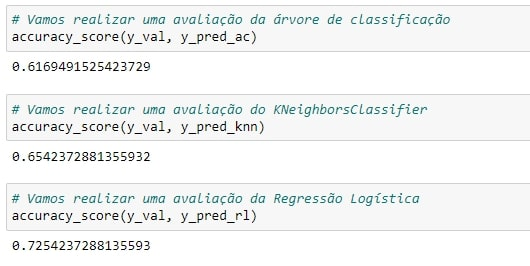

In [47]:
from IPython.display import display, Image

# Imagem da curácia Parte 1
display(Image(filename='img1.jpg', width=500))

* #### Observe-se uma melhoria no resultado da parte 2 em comparação com o primeiro projeto. A acurácia atingiu 0,81 para a Regressão Logística, a mais alta entre os modelos. Na imagem acima, a acurácia para a Regressão Logística é de 0,72 , um aumento de 0,09 percentuais, o que representa uma melhoria significativa

* Vamos realizar uma análise da **matriz de confusão**, pois, para problemas de classificação, ela oferece uma visualização valiosa. Nos permite identificar se estamos cometendo erros significativos em uma determinada direção ou outra.                      
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [48]:
# Fazendo a importação
from sklearn.metrics import confusion_matrix

In [49]:
# Vamos realizar uma avaliação da árvore de classificação
confusion_matrix(y_val, y_pred_ac)

array([[138,  37],
       [ 37,  83]], dtype=int64)

In [50]:
# Vamos realizar uma avaliação do KNeighborsClassifier
confusion_matrix(y_val, y_pred_knn)

array([[147,  28],
       [ 56,  64]], dtype=int64)

In [51]:
# Vamos realizar uma avaliação da Regressão Logística
confusion_matrix(y_val, y_pred_rl)

array([[153,  22],
       [ 32,  88]], dtype=int64)

#### Prosseguindo com a previsão para os dados de teste
 * Utilizaremos o modelo com melhor precisão para efetuar o predict na base de teste

In [52]:
# Visualizando o X_train
X_train.head(5)

,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
6,1,54.000000,0,0,51.8625,1,0,0,1
718,3,29.699118,0,0,15.5000,1,0,1,0
685,2,25.000000,1,2,41.5792,1,1,0,0
73,3,26.000000,1,0,14.4542,1,1,0,0
882,3,22.000000,0,0,10.5167,0,0,0,1


In [53]:
# Visualizando a base de teste
teste.head(5)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,0,1,0
1,893,3,47.0,1,0,7.0000,0,0,0,1
2,894,2,62.0,0,0,9.6875,1,0,1,0
3,895,3,27.0,0,0,8.6625,1,0,0,1
4,896,3,22.0,1,1,12.2875,0,0,0,1


* Para garantir a igualdade entre a base de teste e a base de treino, é necessário remover a coluna 'PassengerId' e essa ação pode ser realizado criando uma nova variável na base de teste.

In [54]:
# Eliminando a coluna de PassengerId e criando uma nova variável
X_teste = teste.drop('PassengerId',axis=1)

In [55]:
# Fazendo a previsão utilizando a regressão logística na base de teste
y_pred = clf_rl.predict(X_teste)

In [56]:
# Criando uma nova coluna com a previsão na base de teste
teste['Survived'] = y_pred

In [57]:
# Selecionando apenas a coluna de Id e Survived para fazer o envio
base_envio = teste[['PassengerId','Survived']]

* ##### Dessa maneira, o resultado está pronto para ser enviado

In [58]:
# Exportando para um csv
base_envio.to_csv('resultados2.csv',index=False)